<a href="https://colab.research.google.com/github/JSJeong-me/Python_RPA/blob/main/excel/3-example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

웹스크래핑 예제(1) - 네이버금융 실시간 검색 순위 스크래핑 후 엑셀에 저장하기

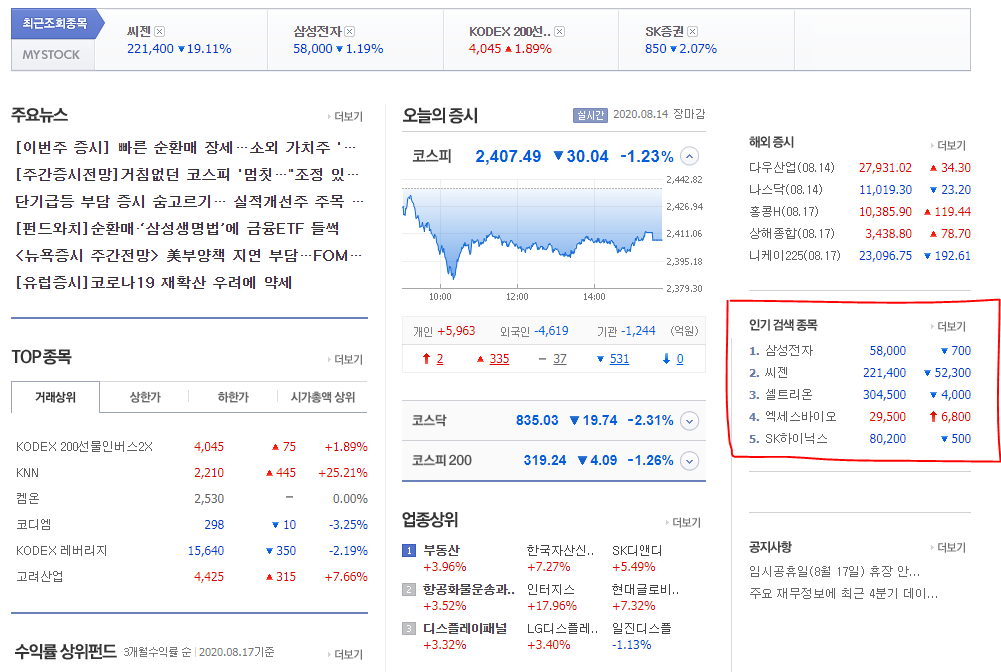

네이버 금융 메인화면에서 실시간 검색순위 데이터를 가져오는 예제 입니다. Beautifulsoup 라이브러리만 이용하면 쉽게 가져올 수 있는데요.

HTML 구조 분석과 css 선택자 사용 연습을 할 수 있는 좋은 예제 인 것 같습니다. 추가적으로, openpyxl을 이용해서 엑셀로 데이터를 저장하는 코드도 작성해 보았습니다.

사이트 구조가 변경될 경우 스크래핑이 안 될 수 있으니, 댓글 남겨 주시면 소스 업데이트 하도록 하겠습니다.

In [1]:
import requests
from bs4 import BeautifulSoup

from openpyxl import Workbook

url = 'https://finance.naver.com/'

response = requests.get(url)
response.raise_for_status()
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tbody = soup.select_one('#container > div.aside > div.group_aside > div.aside_area.aside_popular > table > tbody')
trs = tbody.select('tr')
datas = []
for tr in trs:
    name = tr.select_one('th > a').get_text()
    current_price = tr.select_one('td').get_text() 
    change_direction = tr['class'][0]
    change_price = tr.select_one('td > span').get_text()
    datas.append([name, current_price, change_direction, change_price])


write_wb = Workbook()
write_ws = write_wb.create_sheet('결과')
for data in datas:
    write_ws.append(data)

write_wb.save(r'./파일이름.xlsx')